In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc,f1_score,SCORERS
from sklearn.metrics import make_scorer, confusion_matrix,classification_report
from sklearn.dummy import DummyRegressor, DummyClassifier


In [144]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888-2023/master/lab3-modelling/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [145]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [146]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [148]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [149]:
df.duplicated().sum()

12

In [150]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [151]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [152]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [153]:
df._get_numeric_data().columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [155]:
len(df)

41188

In [156]:
df.drop('duration',axis = 1,inplace=True)

In [157]:
#label encoding
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [158]:
#one-hot-encoding
df.columns
features = ['job','marital','education','default','housing','loan','contact']

In [159]:
df = pd.get_dummies(df)

In [160]:
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [161]:
df.isna().sum()

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

In [162]:
imbalance = (df['y'] ==  1).sum()/len(df['y']) * 100
imbalance

11.265417111780131

<AxesSubplot:xlabel='y', ylabel='Count'>

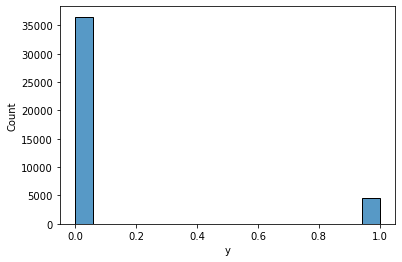

In [163]:
sns.histplot(data = df , x = df['y'])

In [164]:
#splitting the data in testing  and training
X = df.drop('y',axis = 1)
y =  df['y']


In [165]:
X = StandardScaler().fit(X).transform(X)
type(X)


numpy.ndarray

In [166]:
X[0,:]

array([ 1.53303429, -0.56592197,  0.1954139 , -0.34949428,  0.64809227,
        0.72272247,  0.88644656,  0.71245988,  0.33167991, -0.58202282,
       -0.53831699, -0.19143021,  6.15277204, -0.2764353 , -0.2087573 ,
       -0.18903213, -0.3265564 , -0.1473267 , -0.44244927, -0.15887166,
       -0.08987076, -0.35509663,  0.80763764, -0.62493754, -0.04411455,
        2.97708361, -0.24274754, -0.41474269, -0.54809999, -0.0209096 ,
       -0.38191849, -0.64753149, -0.20945296,  0.51371278, -0.51359953,
       -0.00853476,  1.10081447, -0.1569334 , -1.04887691,  0.46173139,
       -0.1569334 , -0.42287213, -1.31826996,  1.31826996, -0.26127446,
       -0.42007603, -0.06662113, -0.45925282, -0.38504233, -0.11590677,
        1.41115463, -0.33253245, -0.13319736, -0.11846175, -0.484371  ,
        1.95899952, -0.51458089, -0.49439422, -0.4960667 , -0.3392905 ,
        0.39770593, -0.1857    ])

In [167]:
#SCV = StratifiedShuffleSplit(n_splits=10,shuffle = True test_size=0.2,random_state=50)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=50,stratify = y)

In [168]:
(y_train == 1).sum()/len(y_train)

0.11265553869499241

In [169]:
(y_test == 1).sum()/len(y_test)

0.11264870114105366

In [184]:
score = cross_val_score(RandomForestClassifier(n_estimators = 300,max_depth = 6), X_train, y_train, cv= 10, scoring='f1')

In [185]:
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.24836601 0.3030303  0.23059867 0.29004329 0.24070022 0.31533477
 0.39183673 0.25054945 0.26695842 0.28144989]
Average score: 0.28


In [ ]:
#score2 = cross_val_score(RandomForestClassifier(n_estimators = 150,max_depth = 6), X_train, y_train, cv= 10, scoring='f1')

In [ ]:
#print(f'Scores for each fold are: {score2}')
#print(f'Average score: {"{:.2f}".format(score2.mean())}')

In [191]:
rfc = RandomForestClassifier(n_estimators = 100,max_depth = 12,random_state=60)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, random_state=60)

In [192]:
X_test

array([[ 0.09365013, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.47748591, -0.20490853,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.1942267 , -0.20490853,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       ...,
       [ 0.47748591, -0.20490853,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.29018564, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.76536274, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ]])

In [193]:
y_pred = rfc.predict(X_test)

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.64      0.26      0.37       928

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



In [195]:
f1_score(y_test,y_pred)

0.37337413925019125

In [177]:
clf_dummy = DummyClassifier(strategy = 'stratified') 
#establishing random_state for reproducibility
#clf_dummy.fit(X_train, y_train)
 
#print(classification_report(y_test,clf_dummy.predict(X_test)))
score_dummy = cross_val_score(clf_dummy, X_train, y_train, cv= 10, scoring='f1')


In [178]:
print(f'Scores for each fold are: {score_dummy}')
print(f'Average score: {"{:.2f}".format(score_dummy.mean())}')

Scores for each fold are: [0.15405046 0.12368421 0.10540541 0.14304993 0.11067194 0.09446694
 0.1012987  0.14608234 0.10133333 0.08695652]
Average score: 0.12


In [181]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [ ]:

rfc2 = RandomForestClassifier(random_state = 50)
search_space = {
    'n_estimators': [100,200,300],
    'max_depth' :[3,16,20],
    'criterion' :['gini','entropy'],
}


In [ ]:
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(estimator = rfc2,
                  param_grid = search_space,
                  scoring = ['f1'],
                  refit = 'f1',
                  cv = 10,
                  verbose = 4
                 )

In [ ]:
GS.fit(X_train,y_train)

In [ ]:
print(GS.best_estimator_)

In [ ]:
print(GS.best_score_) #metric value which is used in refit method

In [ ]:
print(GS.best_params_)

In [ ]:
GS.best_estimator_.fit(X_train,y_train)

In [ ]:
best_estimator_pred = GS.best_estimator_.predict(X_test)

In [ ]:
print(f1_score(y_test,best_estimator_pred))

In [ ]:
print(GS.best_estimator_.feature_importances_)

In [136]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values('rank_test_f1')
df.to_csv('cv_results.csv')

In [79]:
#creating model with best parameters
rfc_best = RandomForestClassifier(n_estimators = 200,max_depth = 16,random_state=50,criterion = 'gini')
rfc_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, n_estimators=200, random_state=50)

In [68]:
y_best_pred = rfc.predict(X_test)

In [70]:
print(f1_score(y_test,y_best_pred))

0.3360522022838499


In [196]:
importances = rfc.feature_importances_
importances

array([0.06027456, 0.02681812, 0.061397  , 0.02900712, 0.06502235,
       0.04868496, 0.05205883, 0.14839298, 0.11366005, 0.00665827,
       0.00708556, 0.00225744, 0.00268158, 0.00436457, 0.00613643,
       0.00322486, 0.00381183, 0.00533711, 0.00613761, 0.0033436 ,
       0.00210266, 0.00501058, 0.00697934, 0.00803355, 0.00084863,
       0.00501172, 0.00371009, 0.00547542, 0.00713246, 0.00025493,
       0.00563577, 0.00865037, 0.00396657, 0.00565497, 0.00425021,
       0.        , 0.008335  , 0.00223994, 0.00840351, 0.00731123,
       0.00269105, 0.00631432, 0.01174459, 0.01319778, 0.00773402,
       0.00319234, 0.00189093, 0.00288501, 0.00502492, 0.01383793,
       0.01107584, 0.00315673, 0.01243934, 0.00414419, 0.00770414,
       0.01000309, 0.00810777, 0.00720908, 0.00712179, 0.01650691,
       0.01205316, 0.07660327])

In [197]:
#feature_scores = pd.Series(importances,index= X_train.columns).sort_values(ascending=False)
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
features = df.columns
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))


[ 7  8 61  4  2  0  6  5  3  1 59 49 43 52 60 42 50 55 31 38 36 56 23 44
 54 39 57 28 58 10 22  9 41 18 14 33 30 27 17 48 25 21 13 34 53 32 16 26
 19 15 45 51 47 40 12 11 37 20 46 24 29 35]
Feature ranking:
1. euribor3m (0.148393)
2. nr.employed (0.113660)
3. poutcome_nonexistent (0.076603)
4. emp.var.rate (0.065022)
5. pdays (0.061397)
6. age (0.060275)
7. cons.conf.idx (0.052059)
8. cons.price.idx (0.048685)
9. previous (0.029007)
10. campaign (0.026818)
11. day_of_week_wed (0.016507)
12. month_jun (0.013838)
13. contact_cellular (0.013198)
14. month_nov (0.012439)
15. poutcome_failure (0.012053)
16. loan_yes (0.011745)
17. month_mar (0.011076)
18. day_of_week_fri (0.010003)
19. education_professional.course (0.008650)
20. housing_unknown (0.008404)
21. default_yes (0.008335)
22. day_of_week_mon (0.008108)
23. marital_married (0.008034)
24. contact_telephone (0.007734)
25. month_sep (0.007704)
26. housing_yes (0.007311)
27. day_of_week_thu (0.007209)
28. education_basic.9y (0.007132)

In [406]:
feature_scores

nr.employed             0.187520
euribor3m               0.146777
pdays                   0.114164
poutcome_success        0.099274
emp.var.rate            0.085325
                          ...   
loan_unknown            0.000419
job_housemaid           0.000394
marital_unknown         0.000233
education_illiterate    0.000069
default_yes             0.000000
Length: 62, dtype: float64

In [122]:
X.shape[1]

62